In [1]:
!pip show transformers

Name: transformers
Version: 4.53.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


## text to audio generation

In [2]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model = "suno/bark-small")

Device set to use cuda:0


In [3]:
text = "Ladybugs have had important roles in culture and religion, being associated with luck, love, fertility and prophecy. "
output = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [4]:
output

{'audio': array([[-0.00463782, -0.00505674, -0.0041648 , ..., -0.00129217,
         -0.00138229, -0.00091634]], dtype=float32),
 'sampling_rate': 24000}

In [5]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"])

**DEBUG: Audio length showing 0:00**

In [11]:
print(type(output["audio"]))
print(len(output["audio"]))

<class 'numpy.ndarray'>
1


In [12]:
print(type(output["audio"]))
print(output["audio"])

<class 'numpy.ndarray'>
[[-0.00463782 -0.00505674 -0.0041648  ... -0.00129217 -0.00138229
  -0.00091634]]


In [13]:
print("Shape:", output["audio"].shape)
print("Sampling rate:", output["sampling_rate"])
print("Duration (sec):", audio_array.shape[0] / output["sampling_rate"])

Shape: (1, 236480)
Sampling rate: 24000
Duration (sec): 9.853333333333333


In [14]:
Audio(output["audio"].squeeze(), rate=output["sampling_rate"])

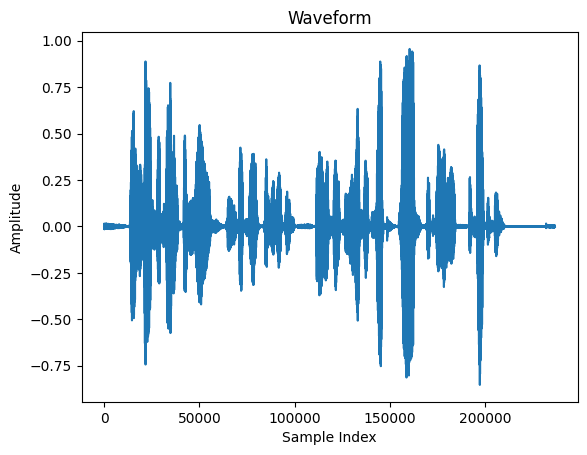

In [15]:
import matplotlib.pyplot as plt

plt.plot(output["audio"].squeeze())
plt.title("Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

**Download it**

In [19]:
import soundfile as sf

sf.write("bark_output.wav", output["audio"].squeeze(), samplerate=output["sampling_rate"])


**French**

In [20]:
fr_text = "Contrairement à une idée répandue, le nombre de points sur les élytres d'une coccinelle ne correspond pas à son âge, ni en nombre d'années, ni en nombre de mois. "
output = pipe(fr_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [21]:
import soundfile as sf

sf.write("bark_output_fr.wav", output["audio"].squeeze(), samplerate=output["sampling_rate"])


**Chinese**

In [22]:
ch_text = "如果当下不治理环境污染，未来地球将难以承受"
output = pipe(ch_text)
sf.write("bark_output_ch.wav", output["audio"].squeeze(), samplerate=output["sampling_rate"])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


**Sing**

In [23]:
song = "♪ In the jungle, the mighty jungle, the ladybug was seen. ♪ "
output = pipe(song)
sf.write("bark_output_song.wav", output["audio"].squeeze(), samplerate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


## Music Gen

In [24]:
music_pipe = pipeline("text-to-audio", model="facebook/musicgen-small")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [25]:
text = "90s rock song with electric guitar and heavy drums"
forward_params = {"max_new_tokens": 1024}

output = music_pipe(text, forward_params=forward_params)


In [ ]:
sf.write("musicgen-1.wav", output["audio"].squeeze(), samplerate=output["sampling_rate"])

In [27]:
text = "Classic 90s grunge rock track featuring gritty electric guitar and thunderous drum beats"
forward_params = {"max_new_tokens": 1024}

output = music_pipe(text, forward_params=forward_params)

In [28]:
sf.write("musicgen-2.wav", output["audio"].squeeze(), samplerate=output["sampling_rate"])